In [1]:
# we will install the libraries using ``piplite``
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['ipywidgets'])
await piplite.install(['tqdm'])

# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# import the visualization package, seaborn:
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error

# Let's load the modules for linear regression:
from sklearn.linear_model import LinearRegression
from scipy import stats

# Libraries for plotting:
from ipywidgets import interact, interactive, fixed, interact_manual

# Polynomial:
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('NextM_Close')
    plt.legend()

In [3]:
df = pd.read_csv('GOOGL_Monthly_Forecast.csv')

In [4]:
df.head(5)

,Date,Open,High,Low,Close,Volume,NextM_Close
0,10/1/2004,3.273273,5.003754,3.225726,4.770771,10272433284,4.554054
1,11/1/2004,4.843594,5.045045,4.036787,4.554054,11092660236,4.824575
2,12/1/2004,4.553303,5.002002,4.215966,4.824575,5807878308,4.895395
3,1/1/2005,4.939940,5.137638,4.411662,4.895395,8198389404,4.704454
4,2/1/2005,4.864364,5.425425,4.529530,4.704454,13011367608,4.517267


# 5. Functions for plotting

In [5]:
# First, let's only use numeric data:

df=df._get_numeric_data()
df.head()

,Open,High,Low,Close,Volume,NextM_Close
0,3.273273,5.003754,3.225726,4.770771,10272433284,4.554054
1,4.843594,5.045045,4.036787,4.554054,11092660236,4.824575
2,4.553303,5.002002,4.215966,4.824575,5807878308,4.895395
3,4.939940,5.137638,4.411662,4.895395,8198389404,4.704454
4,4.864364,5.425425,4.529530,4.704454,13011367608,4.517267


In [6]:
# Libraries for plotting:

from ipywidgets import interact, interactive, fixed, interact_manual

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('NextM_Close (in dollars)')

    plt.show()
    plt.close()

## Part 1: Training and Testing - Split

An important step in testing your model is to split your data into training and testing data. We will place the target data price in a separate dataframe y_data:

In [8]:
y_data = df['NextM_Close']

In [9]:
# Drop Adj Close data in dataframe x_data:

x_data=df.drop('NextM_Close',axis=1)

In [10]:
# Now, we randomly split our data into training and testing data using the function train_test_split.

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 22
number of training samples: 192


The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.

## Linear Regression

Let's import LinearRegression from the module linear_model.

In [11]:
from sklearn.linear_model import LinearRegression

lre=LinearRegression()

In [12]:
lre.fit(x_train[['Open']], y_train)

LinearRegression()

In [13]:
lre.score(x_test[['Open']], y_test)

0.98208658639732

In [14]:
lre.score(x_train[['Open']], y_train)

0.9807896385111212

In [15]:
# We can see the R^2 is slightly smaller using the train data compared to the test data, which means the LR is already almost explaining totally the Next close price variations.

In [16]:
lre.fit(x_train[['Volume']], y_train)

LinearRegression()

In [17]:
lre.score(x_train[['Volume']], y_train)

0.2913132721568592

In [18]:
lre.score(x_test[['Volume']], y_test)

0.18019348972699245

## Part 1: Training and Testing - Cross Validation

In [19]:
# Let's import model_selection from the module cross_val_score.

from sklearn.model_selection import cross_val_score

In [20]:
# We input the object, the feature ("Open"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 10.

Rcross = cross_val_score(lre, x_data[['Open']], y_data, cv=4)

In [21]:
# The default scoring is R^2. Each element in the array has the average R^2 value for the fold:

Rcross

array([0.57325346, 0.77271424, 0.90801952, 0.92191878])

In [22]:
# We calculate the average and standard deviation of our estimate:

print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.7939764982744794 and the standard deviation is 0.140130099124806


In [23]:
# We also use the function 'cross_val_predict' to predict the output.
# The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. 
# First, import the function:

from sklearn.model_selection import cross_val_predict

In [24]:
# We input the object, the feature "Open", and the target data y_data. The parameter 'cv' determines the number of folds. In this case, it is 4. 
# We can produce an output:

yhat = cross_val_predict(lre,x_data[['Open']], y_data,cv=4)
yhat[0:5]

array([4.40527072, 5.97994434, 5.68884871, 6.07655739, 6.00077191])

In [25]:
yhat

array([  4.40527072,   5.97994434,   5.68884871,   6.07655739,
         6.00077191,   5.87304185,   5.68408153,   6.69513422,
         8.22965586,   8.52677313,   8.35312013,   8.29766183,
         8.99327862,  10.45452471,  11.39154877,  11.72580671,
        10.88539469,  10.3717128 ,  10.89794237,  11.62417378,
        10.49668324,  11.66357268,  10.78702478,  10.683636  ,
        11.20836041,  13.13711476,  13.31829657,  12.81691067,
        13.82068625,  12.2314584 ,  12.61013211,  12.97224504,
        13.69521443,  14.30977516,  13.93361039,  14.04703691,
        15.42597449,  18.75901047,  18.46339936,  18.51007337,
        14.38957574,  12.95518087,  12.35868708,  15.63526099,
        15.74040662,  14.16146822,  12.98027523,  13.08717673,
        11.44048303,  10.09617618,   8.31698424,   8.86705371,
         9.51172869,   9.4876381 ,   9.56382739,  10.85338611,
        11.44972808,  11.58736494,  12.20484306,  12.4801168 ,
        13.31851754,  14.42766334,  15.71218964,  16.68

## Part 2: Overfitting, Underfitting and Model Selection

In [26]:
# The test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world. 
# One reason for this is overfitting.

In [27]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [28]:
# Prediction using train data:

lr.fit(x_train[['Open']], y_train)

yhat_train = lr.predict(x_train[['Open']])
yhat_train[0:5]

array([13.64685458, 10.6135546 , 52.69527718, 13.77719131, 16.31611859])

In [29]:
# Prediction using test data:

yhat_test = lr.predict(x_test[['Open']])
yhat_test[0:5]

array([ 22.98473927, 145.85935588,  23.35658966,  22.33204621,
         8.57328752])

In [30]:
# Let's perform some model evaluation using our training and testing data separately.

In [31]:
# First, we import the seaborn and matplotlib library for plotting.

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
# Let's examine the distribution of the predicted values of the training data.

/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


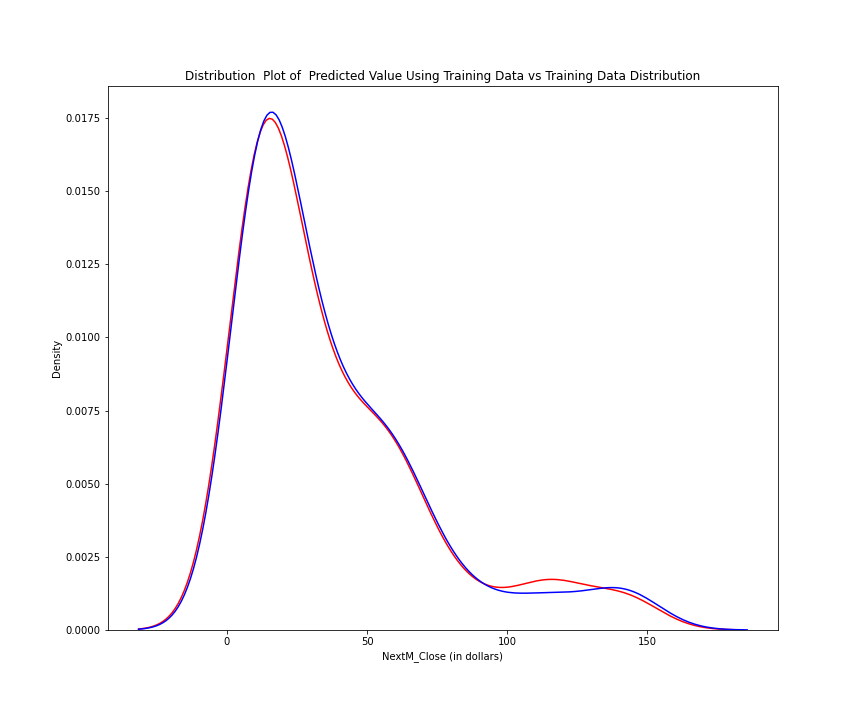

In [33]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'

DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.

So far, the model seems to be doing well in learning from the training dataset.

In [34]:
# Let's see what happens when the model encounters new data from the testing dataset.

/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


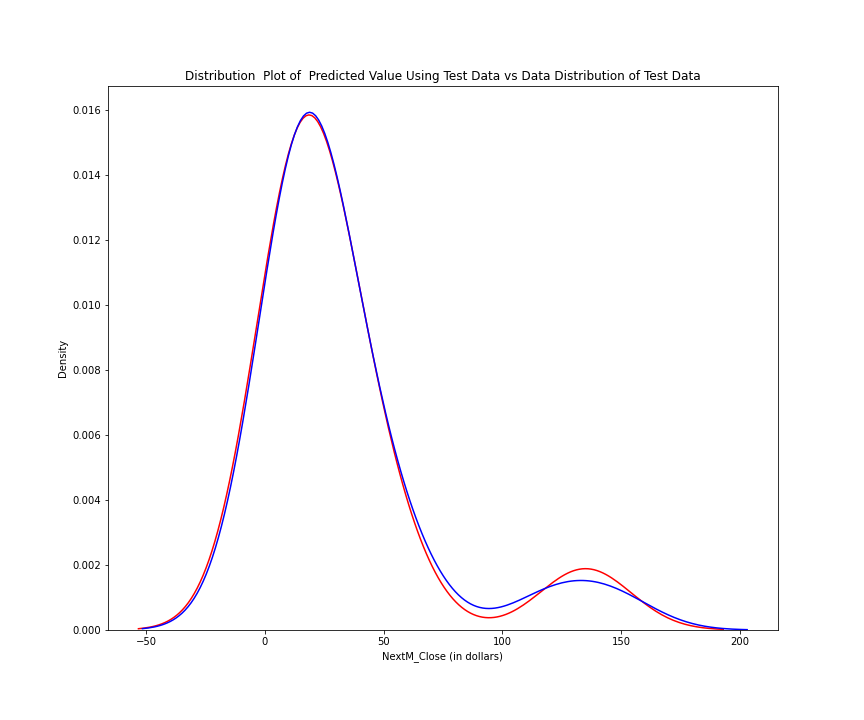

In [35]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

When the model generates new values from the test data, we see the distribution of the predicted values is similar to the actual target values, as in the train data.

In [36]:
# Let's try with the Variable Volume:

lr=LinearRegression()
lr.fit(x_train[['Volume']], y_train)

# Prediction using test data:

yhat_test = lr.predict(x_test[['Volume']])
yhat_test[0:5]

array([40.6915873 , 51.35449817, 46.52752776, 46.62514513, 26.01751565])

/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


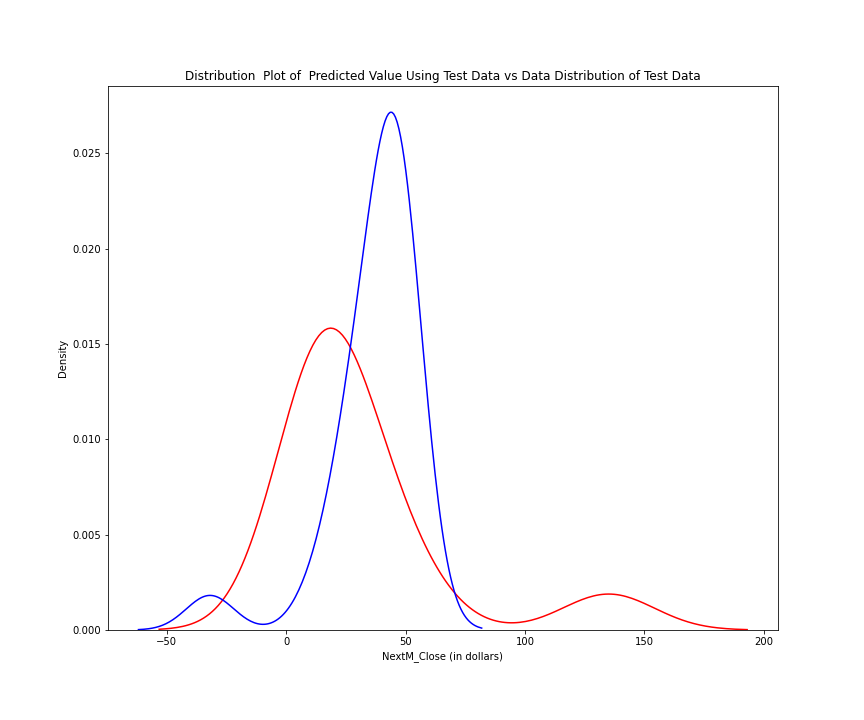

In [37]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

We can see the prediction model shape of the distribution is extremely different from the actual test distribution. So maybe for this Variable Volume, a polynomial regression may increase the prediction accuracy.

Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

## Overfitting

Overfitting occurs when the model fits the noise, but not the underlying process. 
Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
# Let's use 55 percent of the data for training and the rest for testing:

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [41]:
# We will perform a degree 5 polynomial transformation on the feature 'Volume'.

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['Volume']])
x_test_pr = pr.fit_transform(x_test[['Volume']])
pr

PolynomialFeatures(degree=5)

In [42]:
# Now, let's create a Linear Regression model "poly" and train it.

In [43]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [44]:
# We can see the output of our model using the method "predict." We assign the values to "yhat".

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([44.81313036, 11.14454709, 44.45373504, 44.81534755, 44.80646936])

In [45]:
# Let's take the first five predicted values and compare it to the actual targets.

print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [44.81313036 11.14454709 44.45373504 44.81534755]
True values: [117.675003  17.304304  15.136386  60.91    ]


In [46]:
# We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

In [47]:
# R^2 of the training data:

poly.score(x_train_pr, y_train)

0.1329040311952956

In [48]:
# R^2 of the test data:

poly.score(x_test_pr, y_test)

-3.072725083231922

In [49]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

Text(3, 0.75, 'Maximum R^2 ')

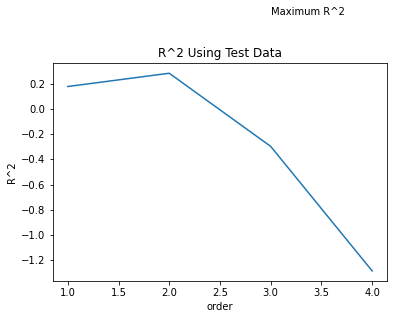

In [50]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['Volume']])
    
    x_test_pr = pr.fit_transform(x_test[['Volume']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [51]:
# We see the R^2 gradually increases until an order two polynomial is used. Then, the R^2 dramatically decreases until an order four polynomial.

In [ ]:
# The following function will be used in the next section.

In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['Volume']])
    x_test_pr = pr.fit_transform(x_test[['Volume']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train, x_test, y_train,y_test, poly, pr)

In [54]:
interact(f, order=(5, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=5, description='order', max=6, min=5), FloatSlider(value=0.45, descripti…

<function __main__.f(order, test_data)>

<Figure size 864x720 with 0 Axes>